In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,6)
%matplotlib inline

In [2]:
df = pd.read_csv('Color_data.csv')
df

,Quality,Fibre,Count,Finish,Print,Coverage,Consum,Issued,Balance,Meters,Mesh,Rod,Speed,Hits,Color-hits,Viscosity,Machine
0,13200046,CV,32,None,Reactive,11.86,210,240,30,10520,195.0,8.0,30.0,1,1,108.0,2.0
1,13200046,CV,32,None,Reactive,56.84,1060,1080,20,10520,125.0,10.0,30.0,1,1,70.0,2.0
2,13200046,CV,32,None,Reactive,18.55,345,360,15,10520,165.0,10.0,30.0,1,1,75.0,2.0
3,13200046,CV,32,None,Reactive,20.81,342,360,18,10520,165.0,10.0,30.0,1,0,68.0,2.0
4,13200046,CV,32,None,Reactive,4.40,102,120,18,10520,155.0,10.0,30.0,1,0,70.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,14000398,CV,40,None,Reactive,4.68,45,70,25,2194,125.0,12.0,30.0,3,1,61.0,1.0
1302,14000398,CV,40,None,Reactive,9.38,73,96,23,2194,125.0,12.0,30.0,3,1,64.0,1.0
1303,14000398,CV,40,None,Reactive,4.54,49,70,21,2194,125.0,12.0,30.0,3,0,62.0,1.0
1304,14000398,CV,40,None,Reactive,4.06,49,74,25,2194,125.0,12.0,30.0,3,2,63.0,1.0


In [3]:
df2 = df.dropna(axis=0,how='any')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 1305
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quality     973 non-null    object 
 1   Fibre       973 non-null    object 
 2   Count       973 non-null    int64  
 3   Finish      973 non-null    object 
 4   Print       973 non-null    object 
 5   Coverage    973 non-null    float64
 6   Consum      973 non-null    int64  
 7   Issued      973 non-null    int64  
 8   Balance     973 non-null    int64  
 9   Meters      973 non-null    int64  
 10  Mesh        973 non-null    float64
 11  Rod         973 non-null    float64
 12  Speed       973 non-null    float64
 13  Hits        973 non-null    int64  
 14  Color-hits  973 non-null    int64  
 15  Viscosity   973 non-null    float64
 16  Machine     973 non-null    float64
dtypes: float64(6), int64(7), object(4)
memory usage: 136.8+ KB


In [4]:
df3 = df2.drop(['Fibre','Count','Issued','Balance'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 1305
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quality     973 non-null    object 
 1   Finish      973 non-null    object 
 2   Print       973 non-null    object 
 3   Coverage    973 non-null    float64
 4   Consum      973 non-null    int64  
 5   Meters      973 non-null    int64  
 6   Mesh        973 non-null    float64
 7   Rod         973 non-null    float64
 8   Speed       973 non-null    float64
 9   Hits        973 non-null    int64  
 10  Color-hits  973 non-null    int64  
 11  Viscosity   973 non-null    float64
 12  Machine     973 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 106.4+ KB


array([[<AxesSubplot:title={'center':'Coverage'}>,
        <AxesSubplot:title={'center':'Consum'}>,
        <AxesSubplot:title={'center':'Meters'}>],
       [<AxesSubplot:title={'center':'Mesh'}>,
        <AxesSubplot:title={'center':'Rod'}>,
        <AxesSubplot:title={'center':'Speed'}>],
       [<AxesSubplot:title={'center':'Hits'}>,
        <AxesSubplot:title={'center':'Color-hits'}>,
        <AxesSubplot:title={'center':'Viscosity'}>],
       [<AxesSubplot:title={'center':'Machine'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

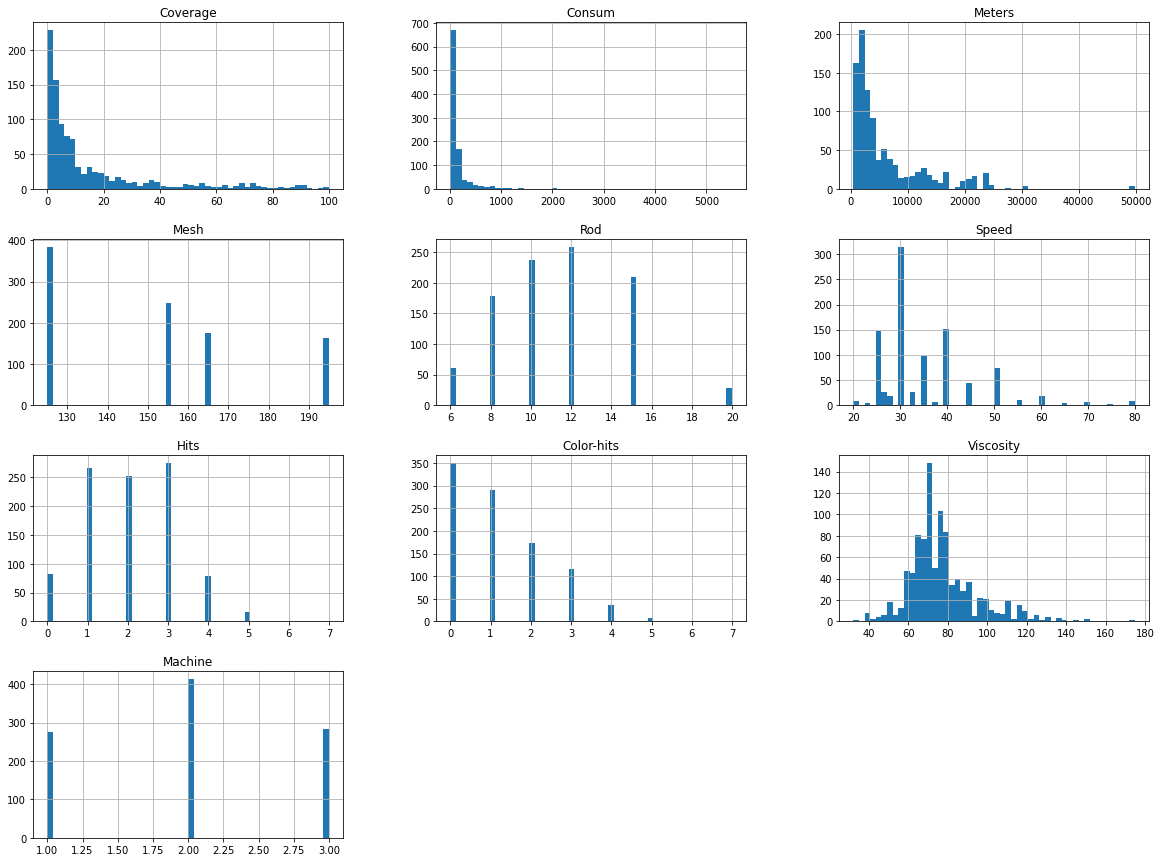

In [5]:
df3.hist(bins=50, figsize=(20,15))

In [6]:
c_list = [i for i in df3.columns if df2[i].dtype=='object']
c_list

['Quality', 'Finish', 'Print']

In [7]:
def onehot_cols(cols):
    df_final = df3
    i = 0
    for c in cols:
        print(c)
        df4 = pd.get_dummies(df3[c], drop_first=False)
        df3.drop([c], axis=1, inplace=True)
        if i == 0:
            df_final = df4.copy()
        else:
            df_final = pd.concat([df_final,df4], axis=1)
        i = i+1
    df_final = pd.concat([df3, df_final], axis=1)
    return df_final

In [8]:
df4 = onehot_cols(c_list)

Quality
Finish
Print


In [9]:
df4.head(10)

,Coverage,Consum,Meters,Mesh,Rod,Speed,Hits,Color-hits,Viscosity,Machine,...,A160B684,A180A234,A280A354,A2A0A621,None,Peach,Raise,Discharge,Pigment,Reactive
0,11.86,210,10520,195.0,8.0,30.0,1,1,108.0,2.0,...,0,0,0,0,1,0,0,0,0,1
1,56.84,1060,10520,125.0,10.0,30.0,1,1,70.0,2.0,...,0,0,0,0,1,0,0,0,0,1
2,18.55,345,10520,165.0,10.0,30.0,1,1,75.0,2.0,...,0,0,0,0,1,0,0,0,0,1
3,20.81,342,10520,165.0,10.0,30.0,1,0,68.0,2.0,...,0,0,0,0,1,0,0,0,0,1
4,4.40,102,10520,155.0,10.0,30.0,1,0,70.0,2.0,...,0,0,0,0,1,0,0,0,0,1
21,37.83,277,3910,125.0,15.0,35.0,0,0,80.0,2.0,...,0,0,0,0,0,0,1,0,1,0
35,78.59,228,2110,125.0,10.0,45.0,0,0,80.0,2.0,...,0,0,0,0,1,0,0,0,1,0
36,3.50,38,2110,125.0,8.0,45.0,0,0,78.0,2.0,...,0,0,0,0,1,0,0,0,1,0
37,6.42,51,3500,195.0,6.0,35.0,2,0,110.0,2.0,...,0,0,0,0,1,0,0,0,1,0
38,52.18,198,3500,155.0,12.0,35.0,2,2,100.0,2.0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
df4

,Coverage,Consum,Meters,Mesh,Rod,Speed,Hits,Color-hits,Viscosity,Machine,...,A160B684,A180A234,A280A354,A2A0A621,None,Peach,Raise,Discharge,Pigment,Reactive
0,11.86,210,10520,195.0,8.0,30.0,1,1,108.0,2.0,...,0,0,0,0,1,0,0,0,0,1
1,56.84,1060,10520,125.0,10.0,30.0,1,1,70.0,2.0,...,0,0,0,0,1,0,0,0,0,1
2,18.55,345,10520,165.0,10.0,30.0,1,1,75.0,2.0,...,0,0,0,0,1,0,0,0,0,1
3,20.81,342,10520,165.0,10.0,30.0,1,0,68.0,2.0,...,0,0,0,0,1,0,0,0,0,1
4,4.40,102,10520,155.0,10.0,30.0,1,0,70.0,2.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,4.68,45,2194,125.0,12.0,30.0,3,1,61.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1302,9.38,73,2194,125.0,12.0,30.0,3,1,64.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1303,4.54,49,2194,125.0,12.0,30.0,3,0,62.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1304,4.06,49,2194,125.0,12.0,30.0,3,2,63.0,1.0,...,0,0,0,0,1,0,0,0,0,1


In [12]:
X = df4.drop(['Consum'],axis=1)
y = df4['Consum']

In [13]:
X.index = [ i for i in np.arange(973)]
y.index = X.index
y

0       210
1      1060
2       345
3       342
4       102
       ... 
968      45
969      73
970      49
971      49
972      51
Name: Consum, Length: 973, dtype: int64

In [14]:
X

,Coverage,Meters,Mesh,Rod,Speed,Hits,Color-hits,Viscosity,Machine,11600084,...,A160B684,A180A234,A280A354,A2A0A621,None,Peach,Raise,Discharge,Pigment,Reactive
0,11.86,10520,195.0,8.0,30.0,1,1,108.0,2.0,0,...,0,0,0,0,1,0,0,0,0,1
1,56.84,10520,125.0,10.0,30.0,1,1,70.0,2.0,0,...,0,0,0,0,1,0,0,0,0,1
2,18.55,10520,165.0,10.0,30.0,1,1,75.0,2.0,0,...,0,0,0,0,1,0,0,0,0,1
3,20.81,10520,165.0,10.0,30.0,1,0,68.0,2.0,0,...,0,0,0,0,1,0,0,0,0,1
4,4.40,10520,155.0,10.0,30.0,1,0,70.0,2.0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,4.68,2194,125.0,12.0,30.0,3,1,61.0,1.0,0,...,0,0,0,0,1,0,0,0,0,1
969,9.38,2194,125.0,12.0,30.0,3,1,64.0,1.0,0,...,0,0,0,0,1,0,0,0,0,1
970,4.54,2194,125.0,12.0,30.0,3,0,62.0,1.0,0,...,0,0,0,0,1,0,0,0,0,1
971,4.06,2194,125.0,12.0,30.0,3,2,63.0,1.0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#model = GradientBoostingRegressor()
#model = AdaBoostRegressor()
model = RandomForestRegressor()

In [17]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8340774030128731

In [18]:
[i for i in X.columns]

['Coverage',
 'Meters',
 'Mesh',
 'Rod',
 'Speed',
 'Hits',
 'Color-hits',
 'Viscosity',
 'Machine',
 '11600084',
 '116414',
 '12000251',
 '120109',
 '120G88',
 '120H89',
 '12400017',
 '13000391',
 '13000437',
 '130176',
 '130C56',
 '130D07',
 '130K00',
 '130Q28',
 '13200046',
 '132144',
 '132340',
 '13257',
 '132B147',
 '14000313',
 '14000396',
 '14000398',
 '14000756',
 '1400398',
 '140117',
 '14015',
 '140313',
 '140324',
 '140367',
 '140J17',
 '14500101',
 '150264',
 '150442',
 '150G07',
 '16000173',
 '16000314',
 '16009',
 '160A63',
 '18006',
 'A120A528',
 'A120B045',
 'A120B375',
 'A120C093',
 'A130A343',
 'A130B074',
 'A130B459',
 'A130B609',
 'A130B652',
 'A130B680',
 'A130C150',
 'A130D001',
 'A130D621',
 'A130K00',
 'A132A44',
 'A132A744',
 'A132A901',
 'A132A927',
 'A132B006',
 'A132B147',
 'A132B148',
 'A1400058',
 'A1400232',
 'A140A622',
 'A140C096',
 'A140C537',
 'A140C538',
 'A140D080',
 'A140D377',
 'A140D660',
 'A140D663',
 'A140D722',
 'A140E042',
 'A140E111',
 'A140

In [19]:
def predict_consum(article,finish,prints,cover,meters,mesh,rod,speed,hits,c_hits,viscosity,machine):
    print('starting')
    try:
        art_index = np.where(X.columns==article)[0][0]
    except:
        return 0
    print(art_index)
    try:
        fin_index = np.where(X.columns==finish)[0][0]
    except:
        return 0
    print(fin_index)
    try:
        pri_index = np.where(X.columns==prints)[0][0]
    except:
        return 0
    print(pri_index)
    print('params: ',art_index,fin_index,pri_index)
    x = np.zeros(len(X.columns))
    print(x)
    x[0] = cover
    x[1] = meters
    x[2] = mesh
    x[3] = rod
    x[4] = speed
    x[5] = hits
    x[6] = c_hits
    x[7] = viscosity
    x[8] = machine
    if art_index or fin_index or pri_index > 0:
        x[art_index] = 1
        x[fin_index] = 1
        x[pri_index] = 1
    print(x)
    return model.predict([x])[0]

In [20]:
predict_consum('13200046','Peach','Reactive',40,1000,125,8,30,1,1,70,2)

starting
23
107
111
params:  23 107 111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[  40. 1000.  125.    8.   30.    1.    1.   70.    2.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


105.67

In [21]:
import pickle
with open('color_model.pickle','wb') as f:
    pickle.dump(model,f)

In [22]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))